In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
from matplotlib import colormaps as cm
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud
import numpy as np 
from scipy import stats
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors 
from collections import Counter
cmap2 = cm.get_cmap('twilight')
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))
    #print(rgb2hex(rgb))
# Set style
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('./Customer-Personality-Analysis/marketing_campaign.csv',low_memory = False, sep='\t')

In [4]:
# Get to know your data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
# Find missing Values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Statistical Analysis of your data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
# Fill missing data in the income column with mean
df['Income'].fillna((df['Income'].mean()),inplace=True)
# Again Check for missing values
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
# Get unique values of Education Column
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
# Get unique values of Marital Status
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
#Get the response column unique values 
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
df.Response.unique()

array([1, 0], dtype=int64)

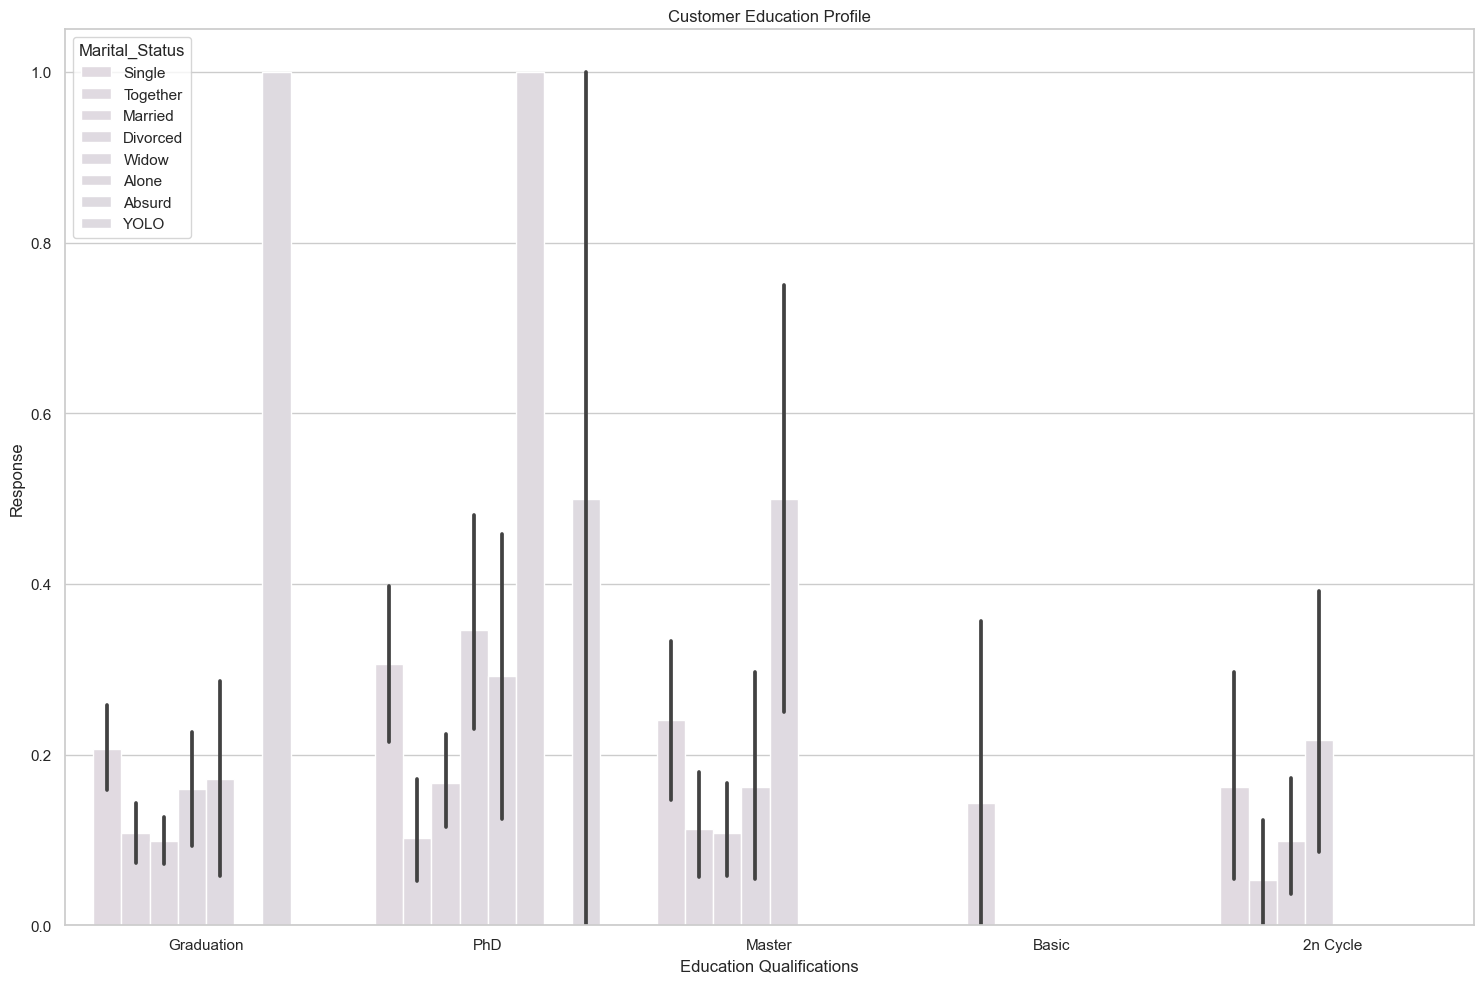

In [11]:
# Customer's Education profile and Response rate
plt.figure(figsize = (15,10))
sns.barplot(x='Education',y='Response', data=df,palette=colors1, hue='Marital_Status')
plt.xlabel('Education Qualifications')
plt.title("Customer Education Profile")
plt.tight_layout()

plt.show()

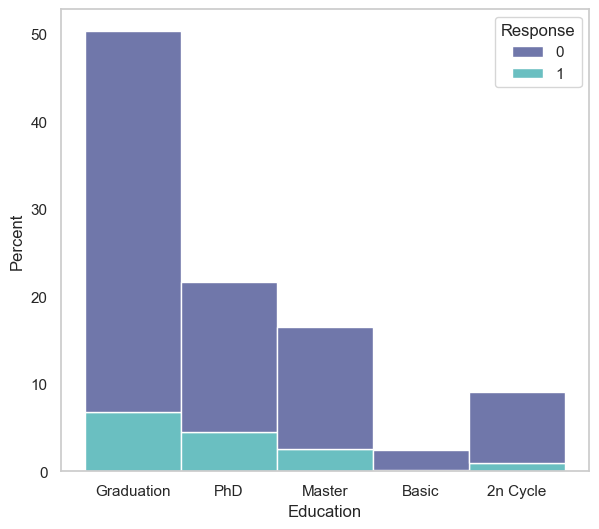

In [12]:
# Education & Response
plt.figure(figsize=(15,6))
plt.subplot(121)
sns.histplot(x="Education", hue="Response", data=df, multiple="stack", stat="percent",palette='mako')

plt.grid(False)

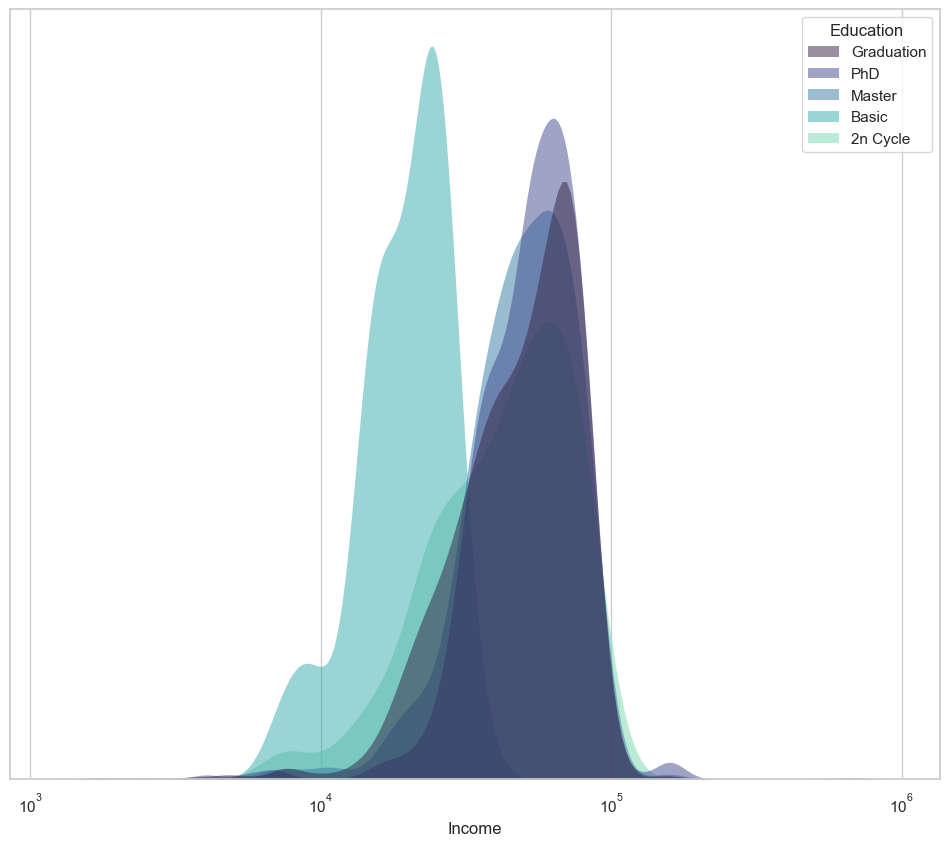

In [13]:
# Education and Income 
plt.figure(figsize=(12,10))
sns.kdeplot(
   data=df, x="Income", hue="Education", log_scale= True,
   fill=True, common_norm=False, palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 

plt.show()

In [14]:
# Analyze Marital Status and Purchases
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2332\2386050006.py:3: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



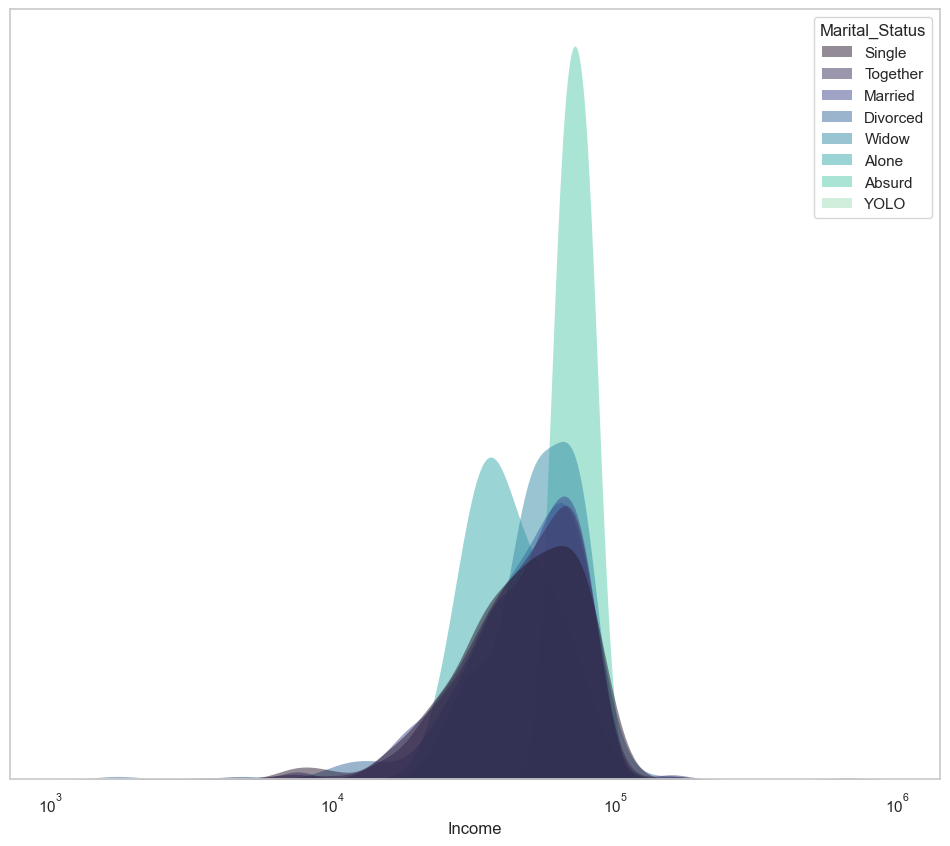

In [15]:
# Marital Status vs Income
plt.figure(figsize=(12,10))
sns.kdeplot(
   data=df, x="Income", hue="Marital_Status", log_scale= True,
   fill=True, common_norm=False, palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 
plt.grid(False)

plt.show()

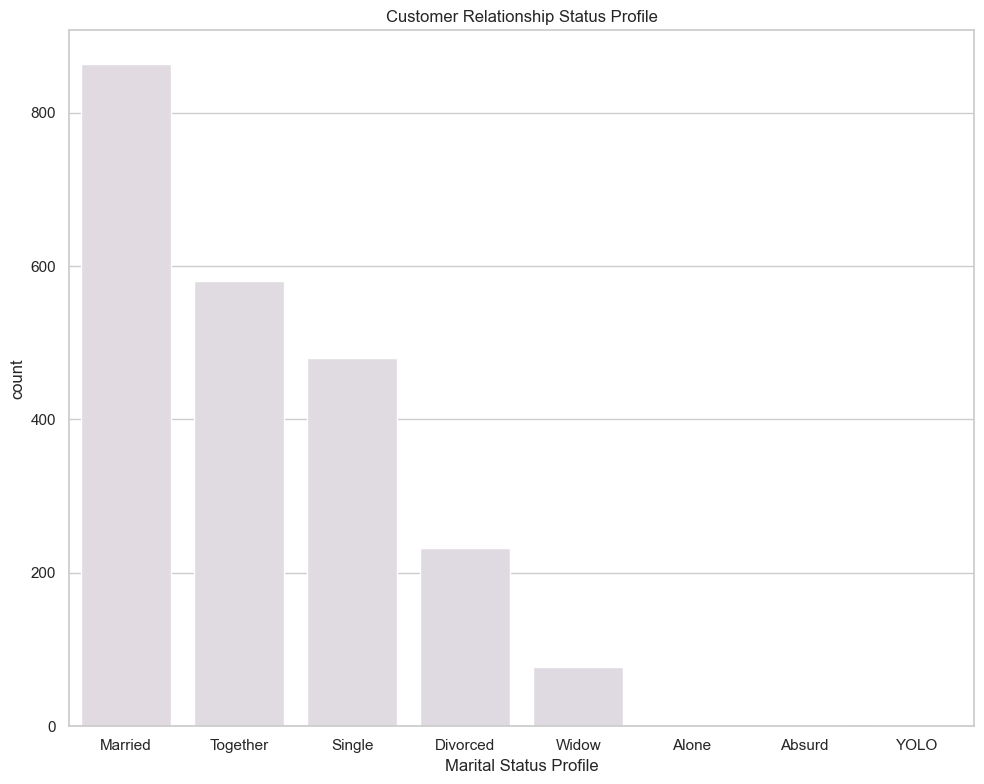

In [16]:
# Customer Relationship Status Profile
plt.figure(figsize = (10,8))
sns.countplot(x='Marital_Status',data=df,palette=colors1,order = df['Marital_Status'].value_counts().index)
plt.xlabel('Marital Status Profile')
plt.title("Customer Relationship Status Profile")
plt.tight_layout()

plt.show()

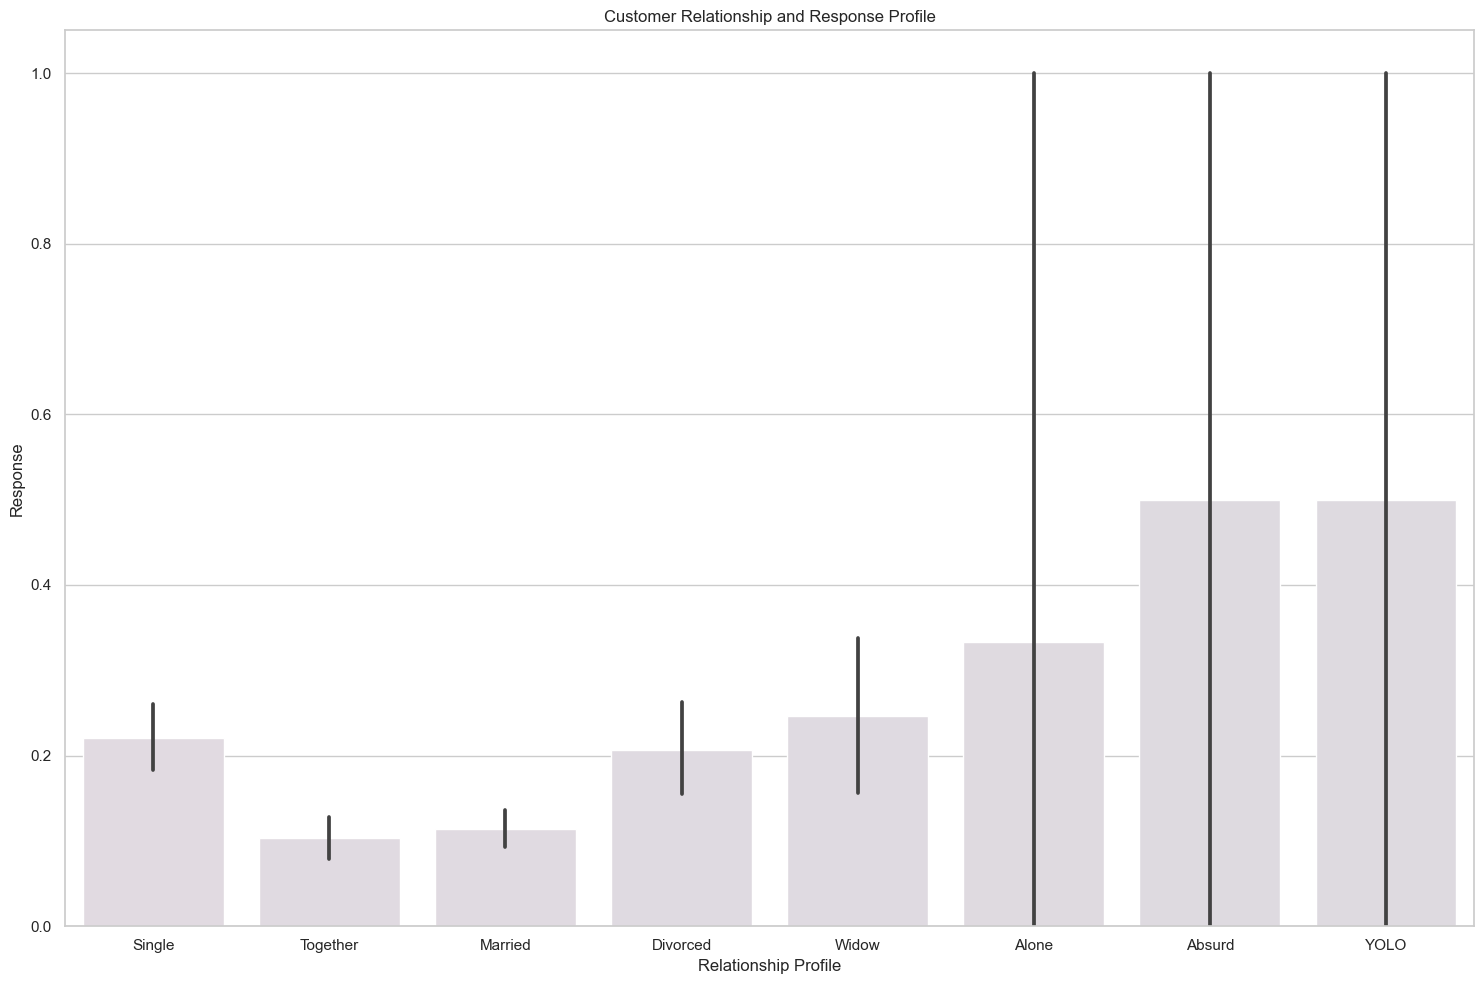

In [17]:
# Customer's Relationship profile and Response rate
plt.figure(figsize = (15,10))
sns.barplot(x='Marital_Status',y='Response', data=df,palette=colors1)
plt.xlabel('Relationship Profile')
plt.title("Customer Relationship and Response Profile")
plt.tight_layout()

plt.show()

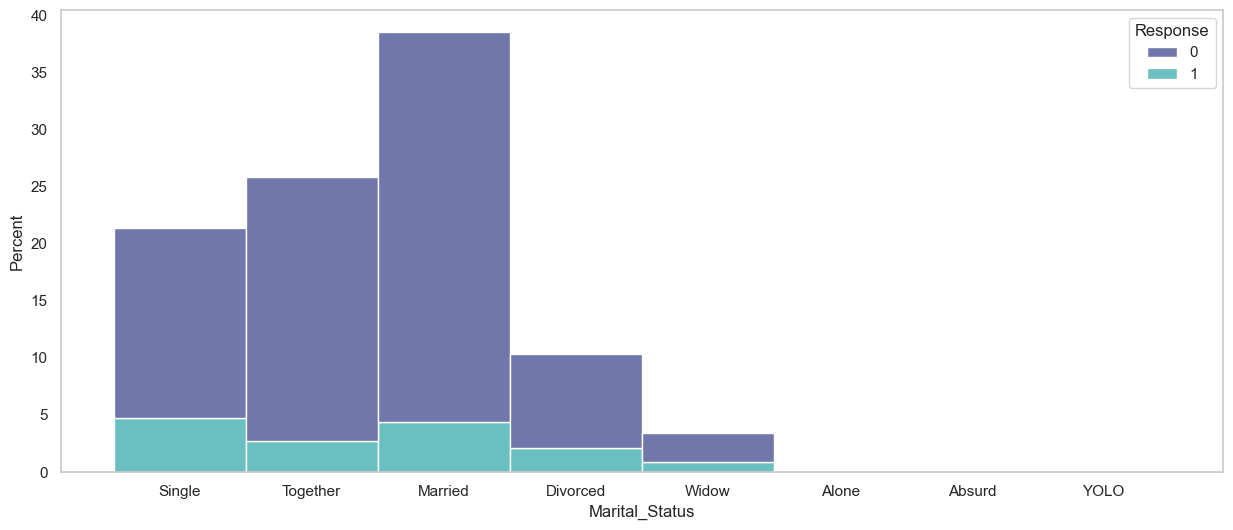

In [18]:
# Marital Status Vs Response Rate
plt.figure(figsize=(15,6))
sns.histplot( x="Marital_Status", data=df, hue="Response",stat="percent", multiple="stack",palette='mako')
plt.grid(False)

plt.show()

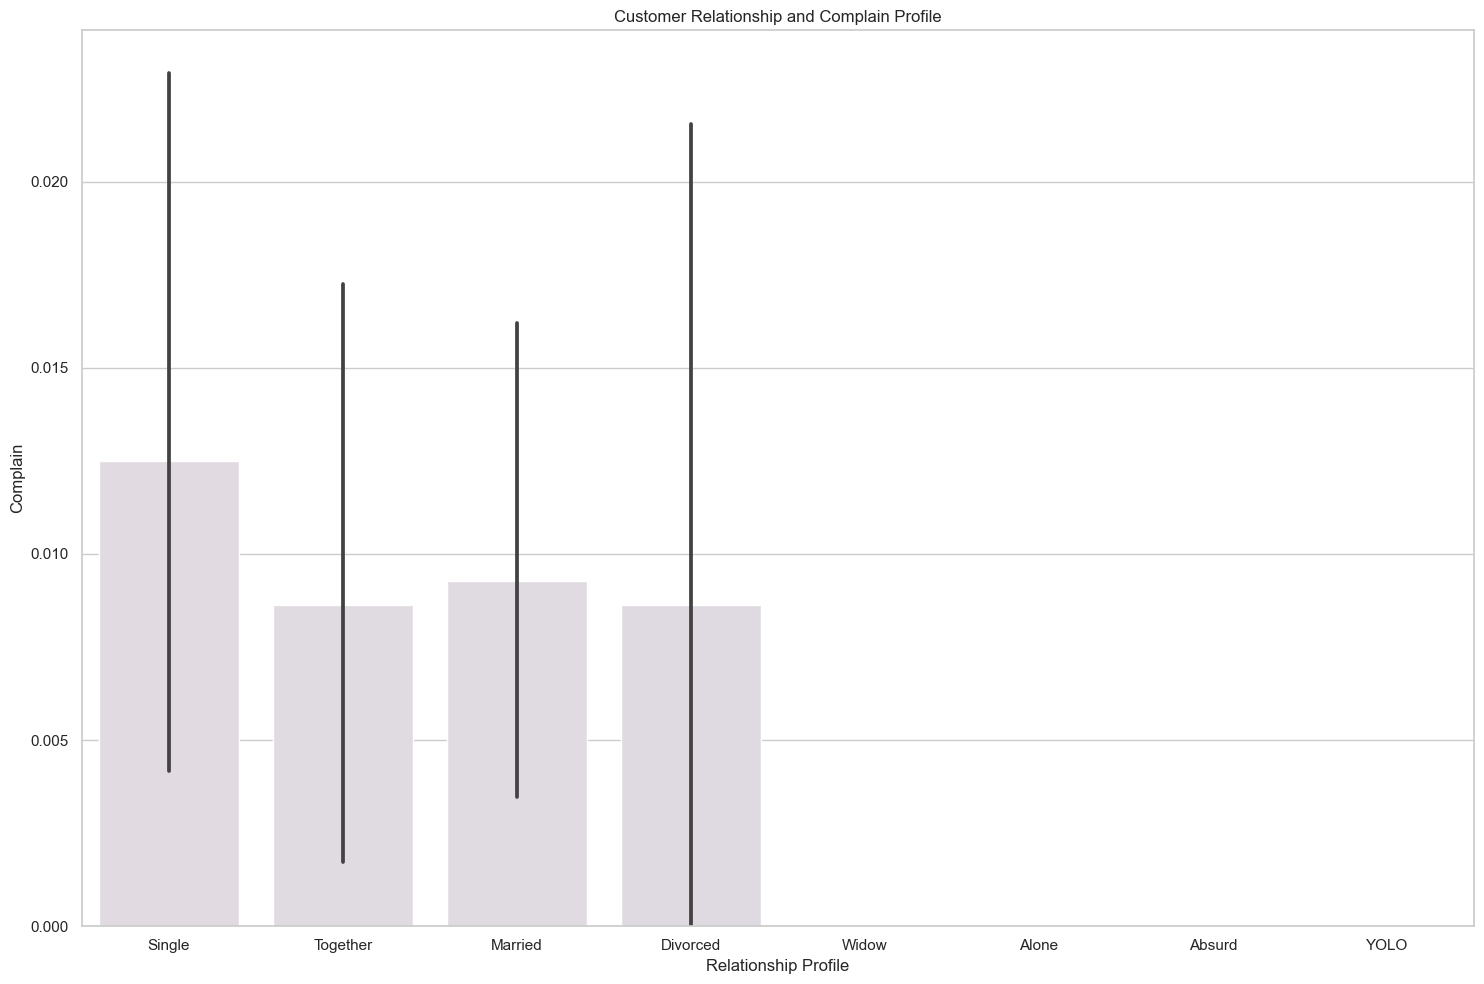

In [19]:
# Customer's Relationship profile and Complain
plt.figure(figsize = (15,10))
sns.barplot(x='Marital_Status',y='Complain', data=df,palette=colors1)
plt.xlabel('Relationship Profile')
plt.title("Customer Relationship and Complain Profile")
plt.tight_layout()

plt.show()

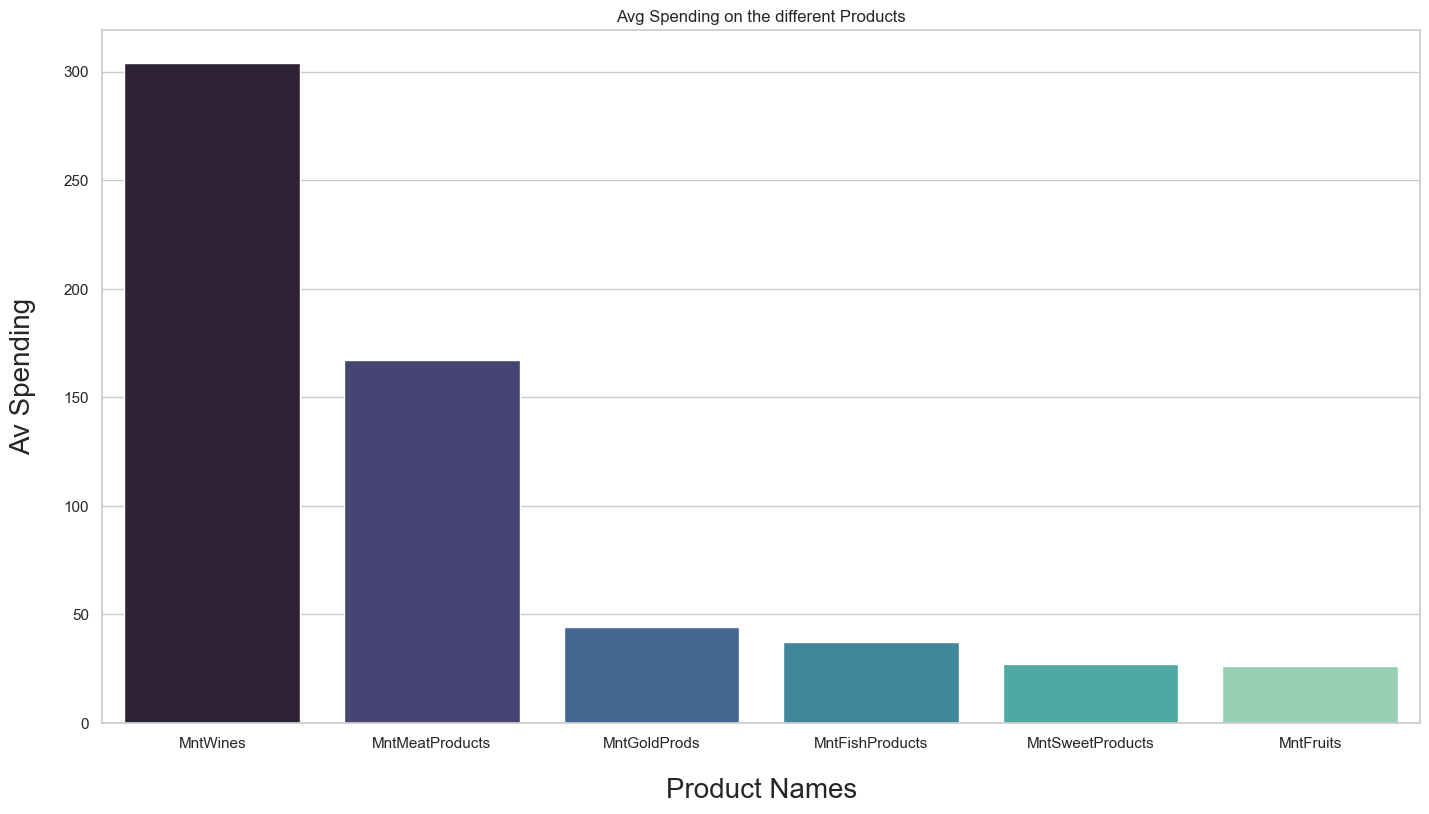

In [20]:
# Most bought products
pr = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
pr_means = pr.mean(axis=0).sort_values(ascending=False)
pr_means_df = pd.DataFrame(list(pr_means.items()), columns=['Product', 'Avg Spending'])
plt.figure(figsize=(17,9))
plt.title('Avg Spending on the different Products')
sns.barplot(data=pr_means_df, x='Product', y='Avg Spending',palette='mako');
plt.xlabel('Product Names', fontsize=20, labelpad=20)
plt.ylabel('Av Spending', fontsize=20, labelpad=20)

plt.show()

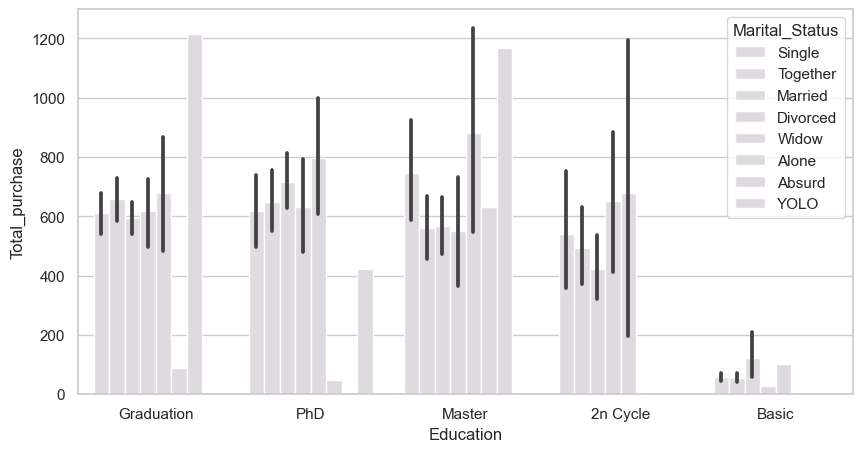

In [21]:
# Customer Age and Amount Spent on Product Purchases [ Who spent how much]
plt.figure(figsize=(10, 5),dpi=100)
df['Total_purchase'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
#plt.subplot(1, 1, 1)
sns.barplot(x='Education',y='Total_purchase',data=df,palette=colors1,order=df['Education'].value_counts().index,hue='Marital_Status')

plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2332\1385159383.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



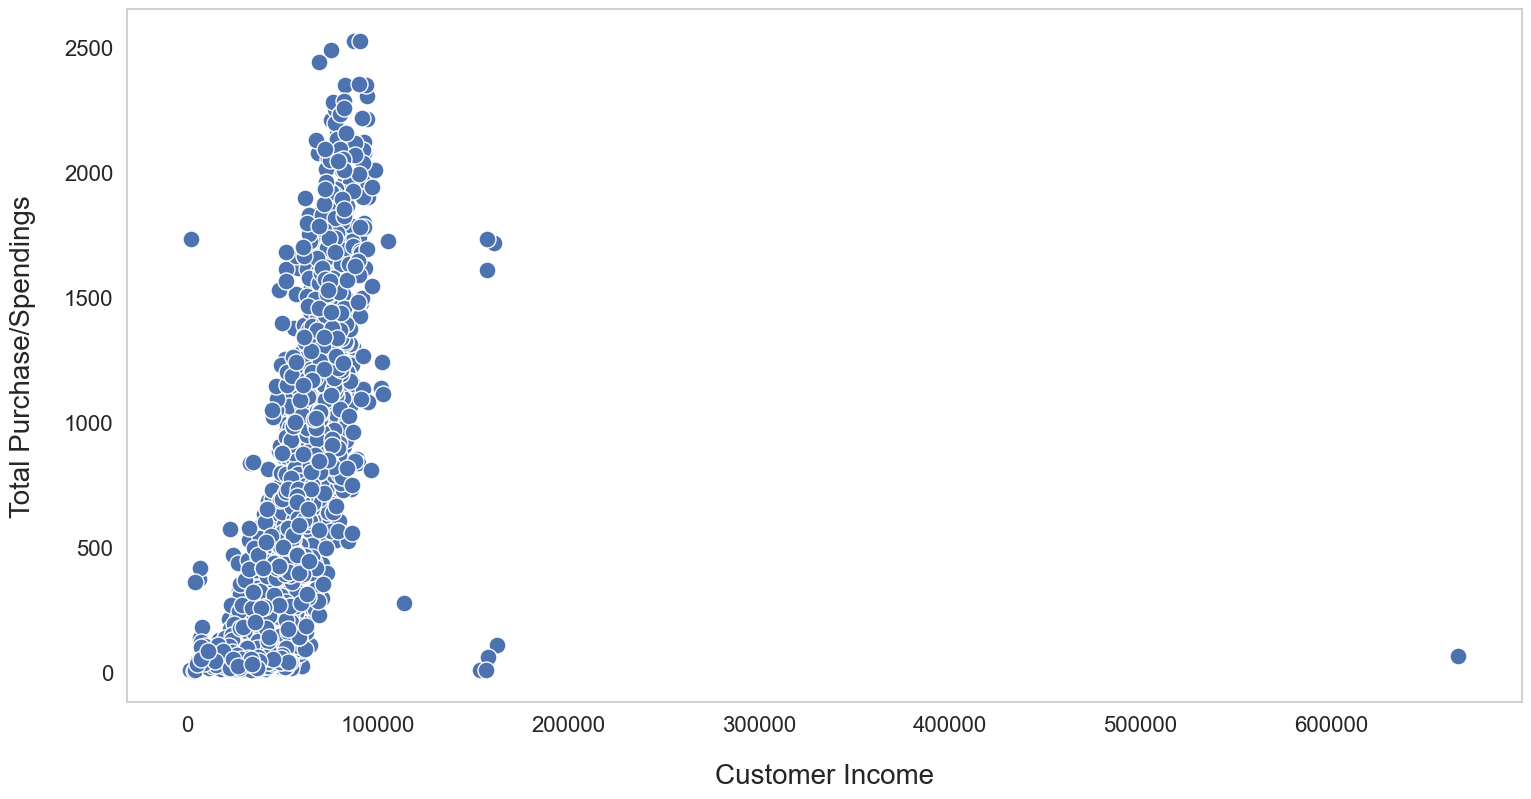

In [22]:
# Total Purchase/Spendings on diferent products by Income
plt.figure(figsize=(18,9))
sns.scatterplot(x=df['Income'], y=df['Total_purchase'], s=150,palette='mako');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.grid(False)
plt.xlabel('Customer Income', fontsize=20, labelpad=20)
plt.ylabel('Total Purchase/Spendings', fontsize=20, labelpad=20)

plt.show()

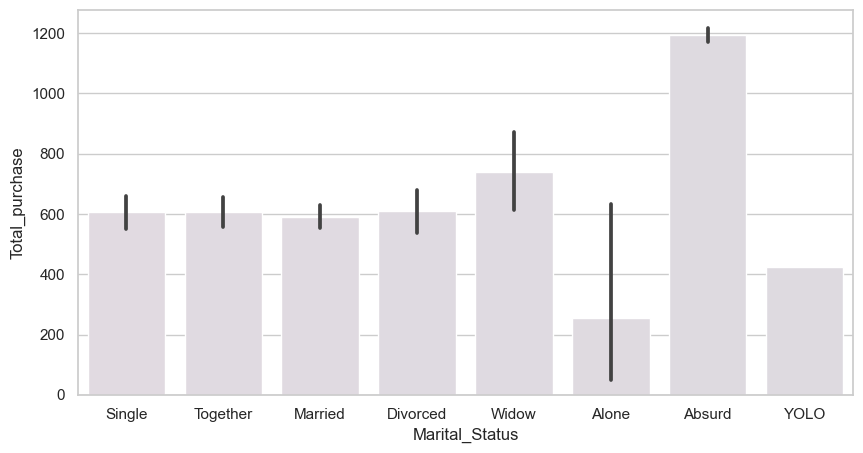

In [23]:
# Total Purchase by Marital Status
plt.figure(figsize=(10, 5),dpi=100)
sns.barplot(x='Marital_Status',y='Total_purchase',data=df,palette=colors1)

plt.show()

In [24]:
# Total places from where purchases have been made
df['Total_place_purchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases'] + df['NumWebVisitsMonth']

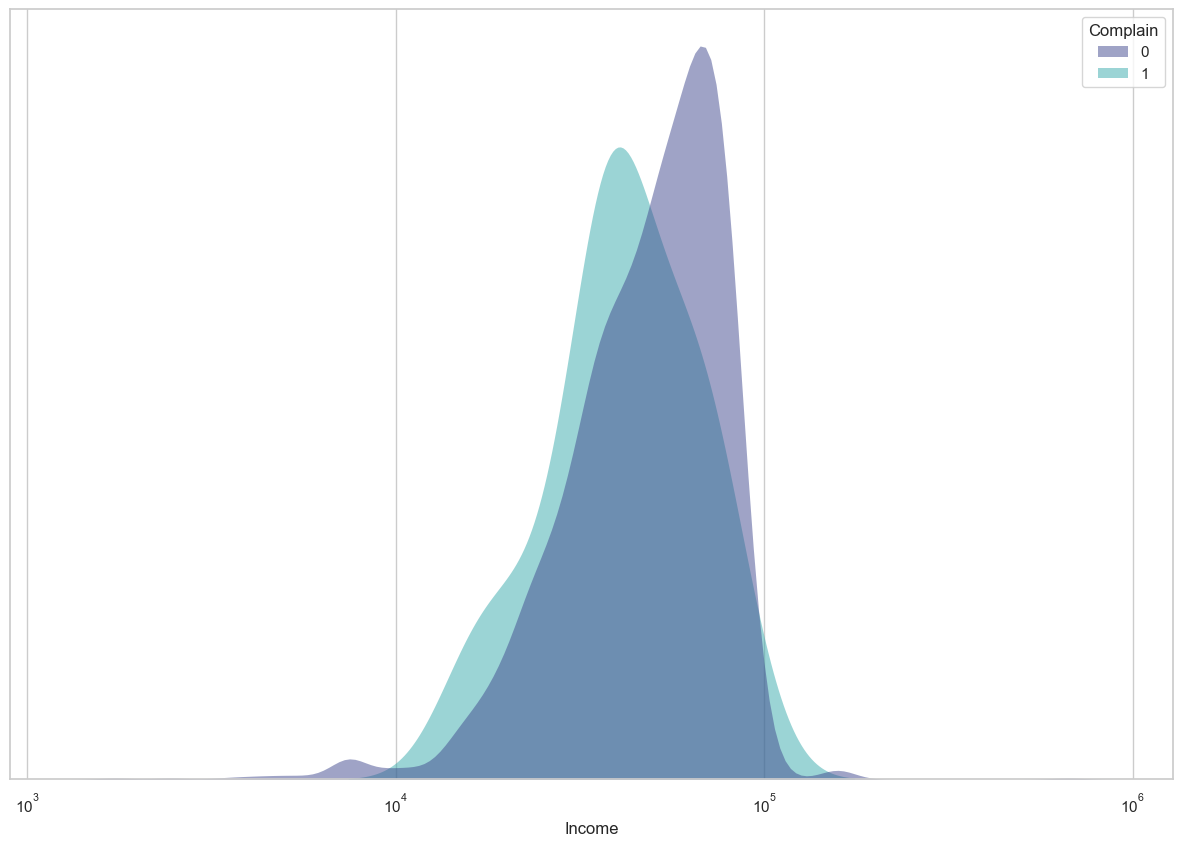

In [25]:
# Complaint Plot
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Complain", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 
plt.xlabel('Income')

plt.show()

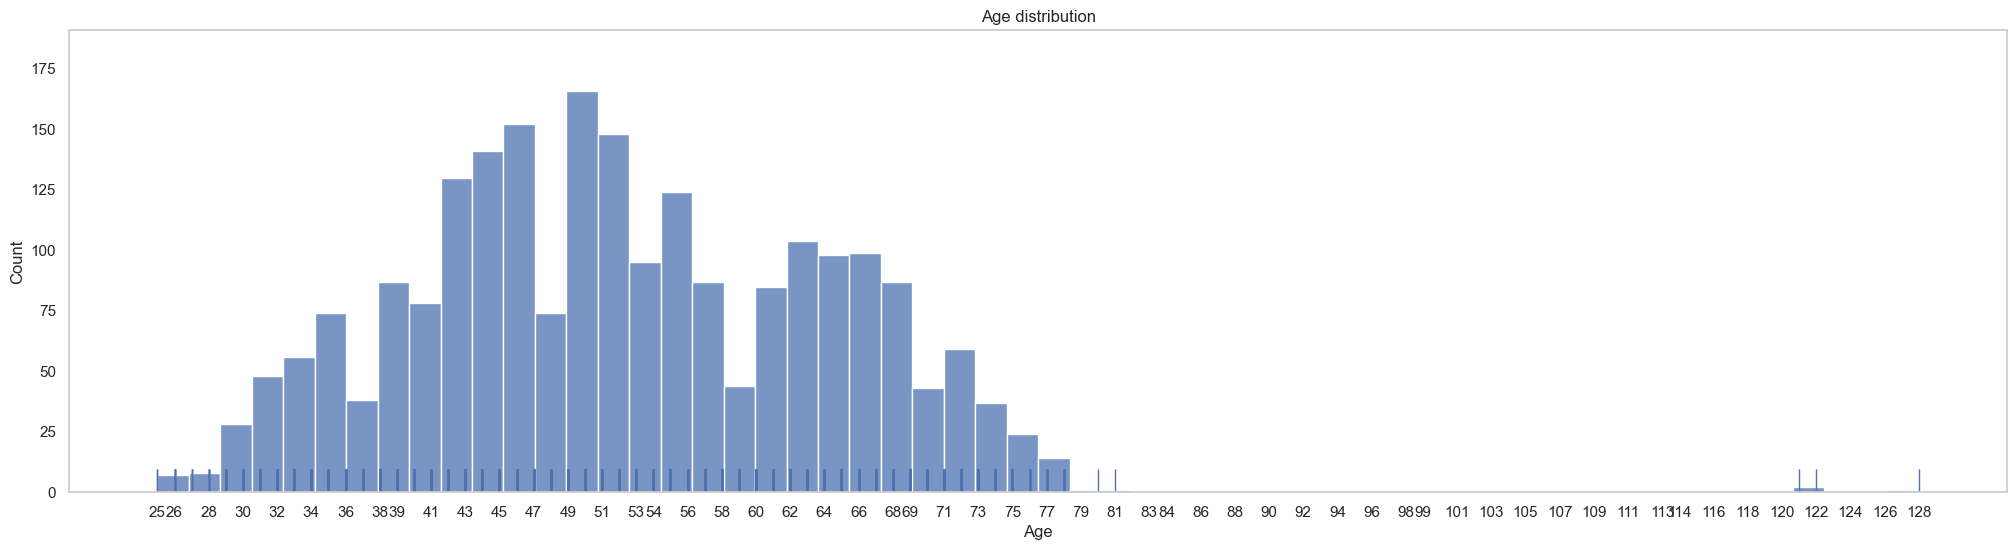

In [26]:
import datetime as dt
df['Age'] = 2021 - df.Year_Birth
# Age Level
plt.figure(figsize=(25, 6))
plt.title('Age distribution')
ax = sns.histplot(df['Age'].sort_values(), bins=56)
sns.rugplot(data=df['Age'], height=.05)
plt.xticks(np.linspace(df['Age'].min(), df['Age'].max(), 56, dtype=int, endpoint = True))
plt.grid(False)
plt.show()

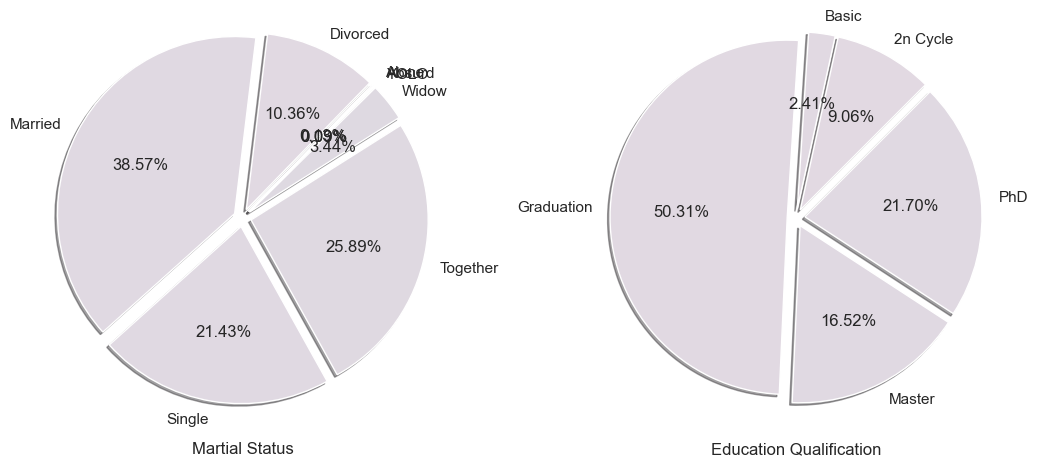

In [27]:
# Education and Marital Status
cc=df.groupby("Marital_Status").count()['Age']
label=df.groupby('Marital_Status').count()['Age'].index
fig, ax = plt.subplots(1, 2, figsize = (10, 12))
ax[0].pie(cc, labels=label, shadow=True, autopct='%1.2f%%',explode=[0.1 for i in cc.index],radius=2,colors=colors1,startangle=45)
ax[0].set_title('Martial Status', y=-0.6)
cc1 = df.groupby("Education").count()['Age']
label = df.groupby('Education').count()['Age'].index
ax[1].pie(cc1, labels=label, shadow=True, autopct='%1.2f%%',explode=[0.1 for i in cc1.index],radius=2,colors=colors1,startangle=45)
ax[1].set_title('Education Qualification', y=-0.6)
plt.subplots_adjust(wspace = 1.5, hspace =0)

plt.show()

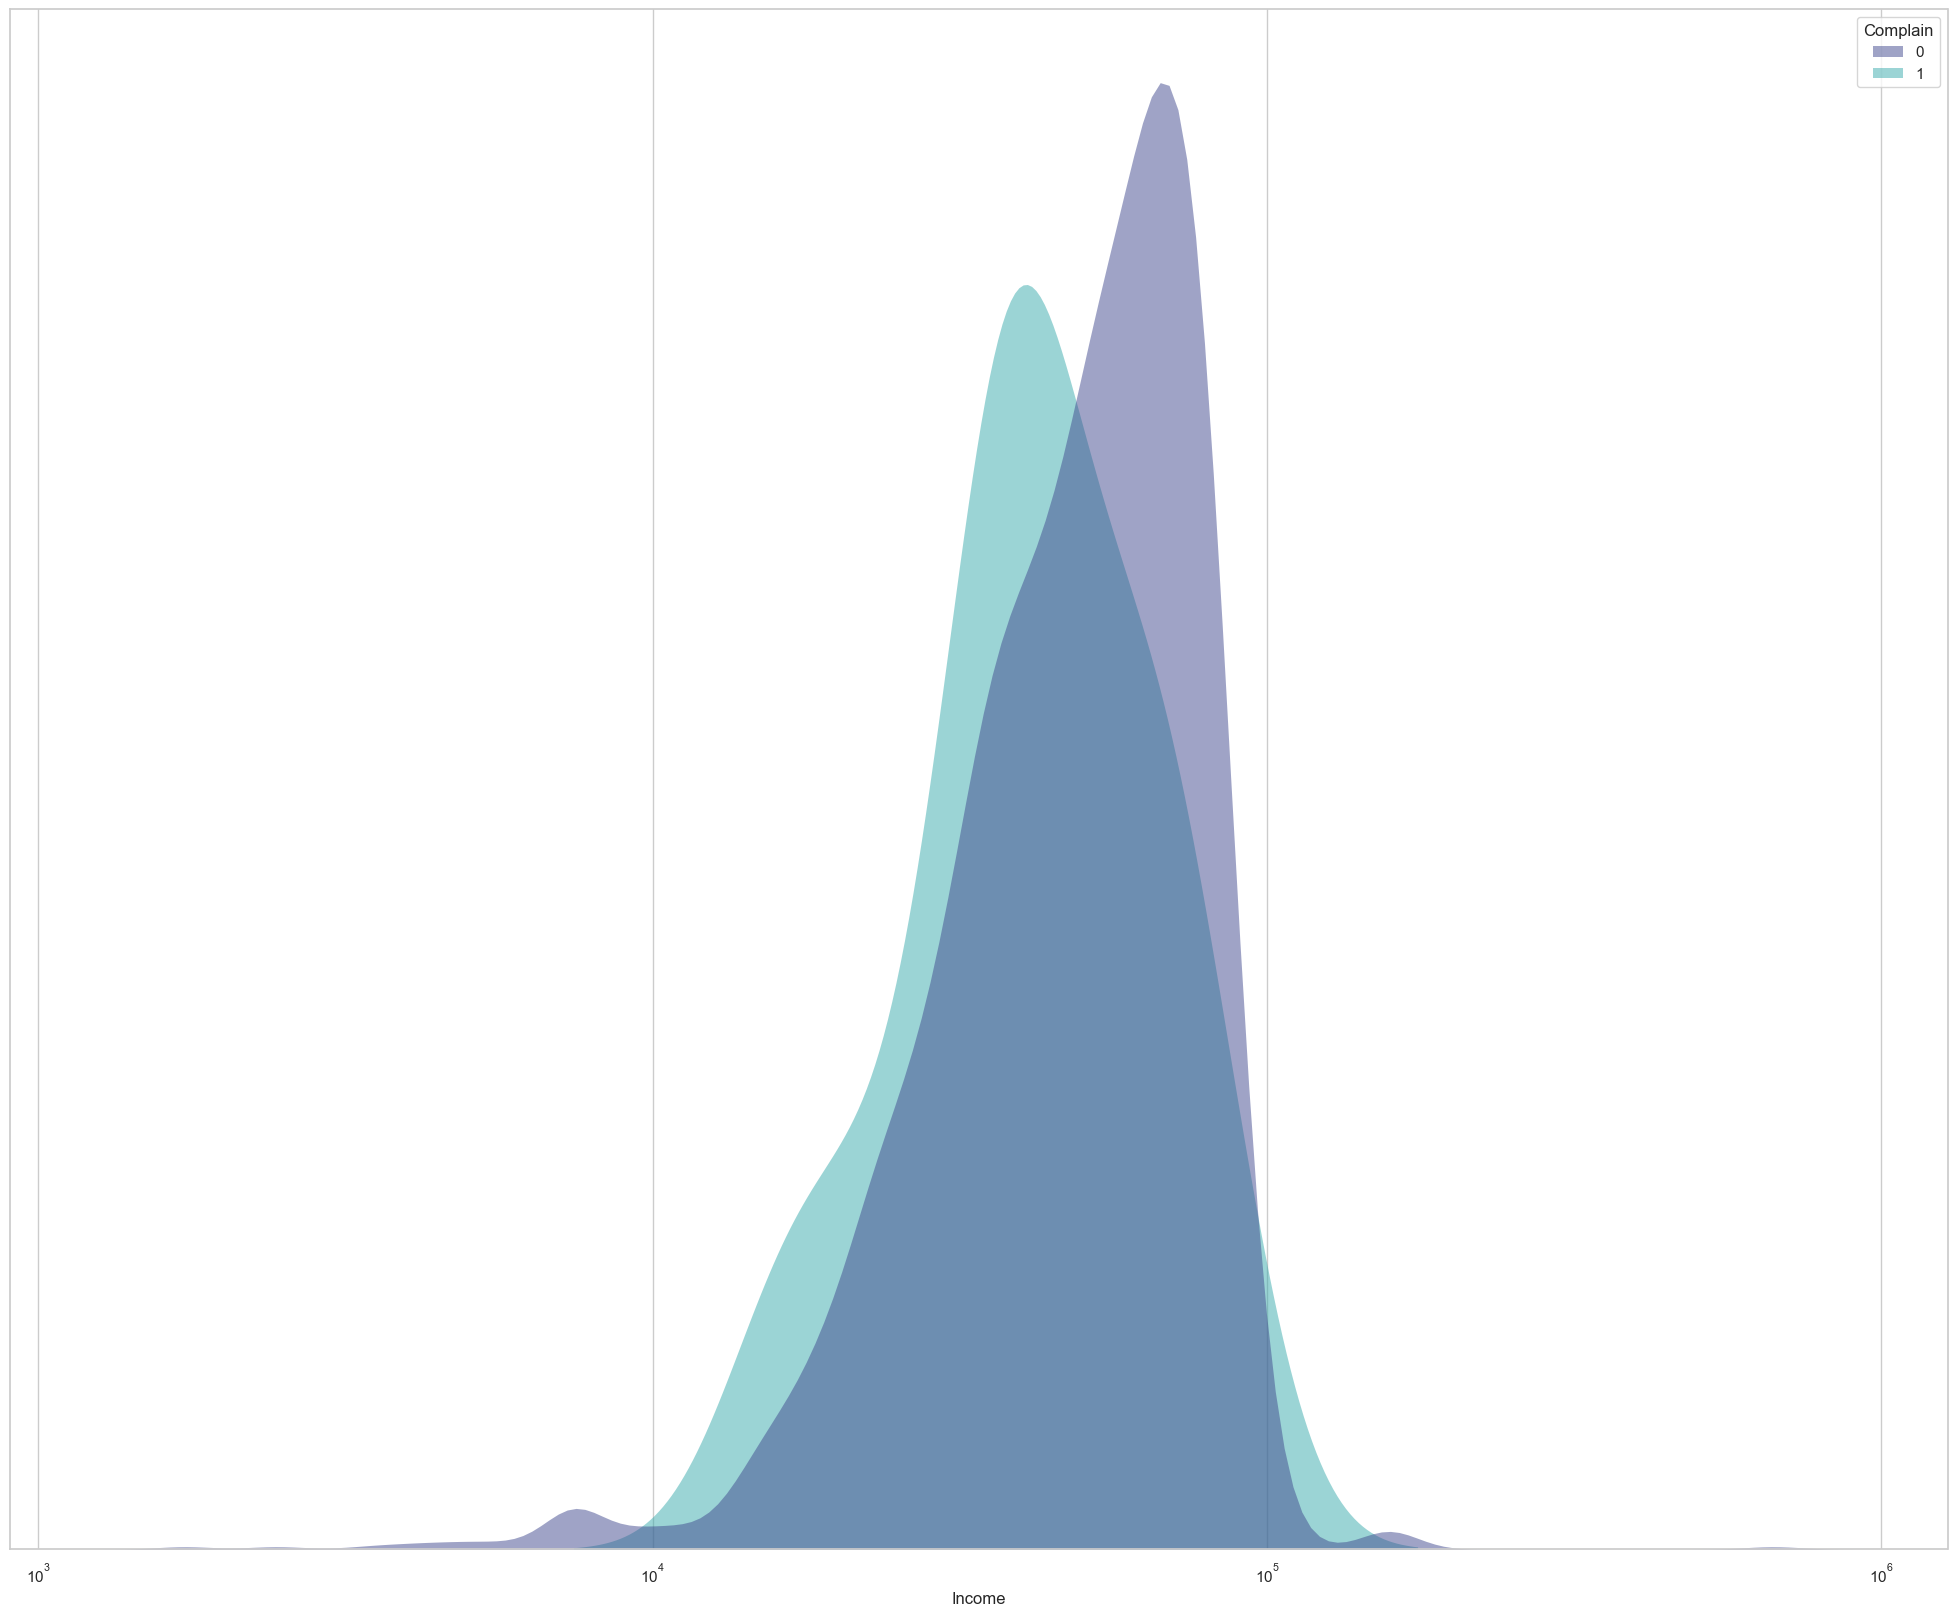

In [28]:
plt.figure(figsize=(25,20))
sns.kdeplot(
   data=df, x="Income", hue="Complain", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

plt.show()

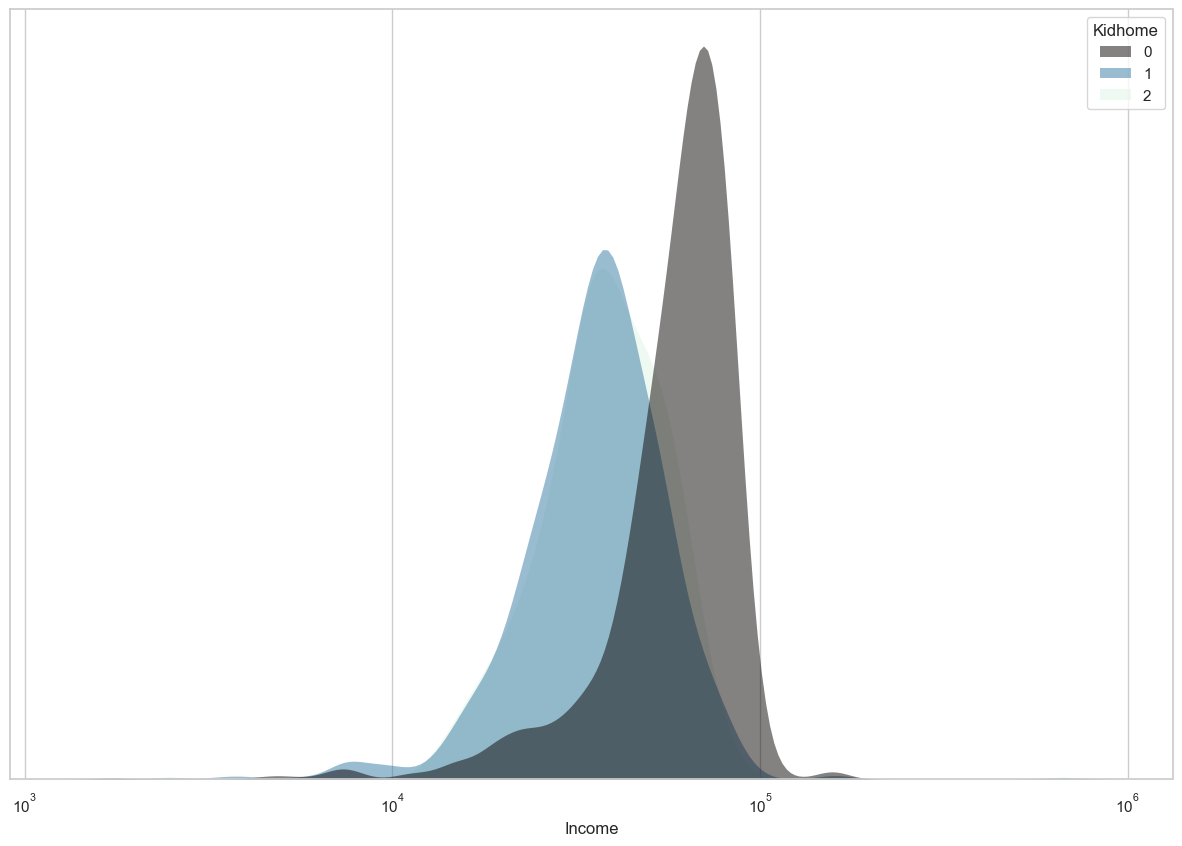

In [29]:
# No of Kids home vs Income
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Kidhome", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 
plt.xlabel('Income')

plt.show()

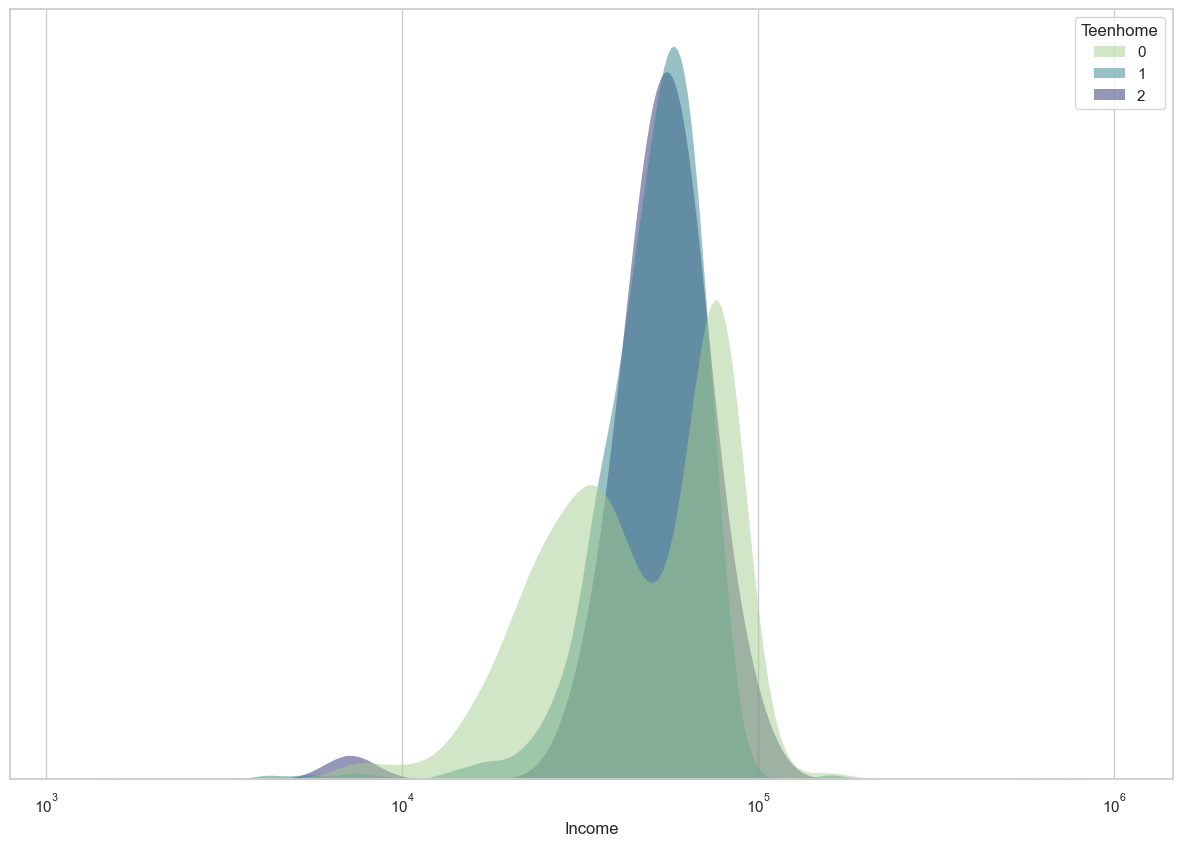

In [30]:
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Teenhome", log_scale= True,
   fill=True, common_norm=False,palette='crest',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

plt.show()

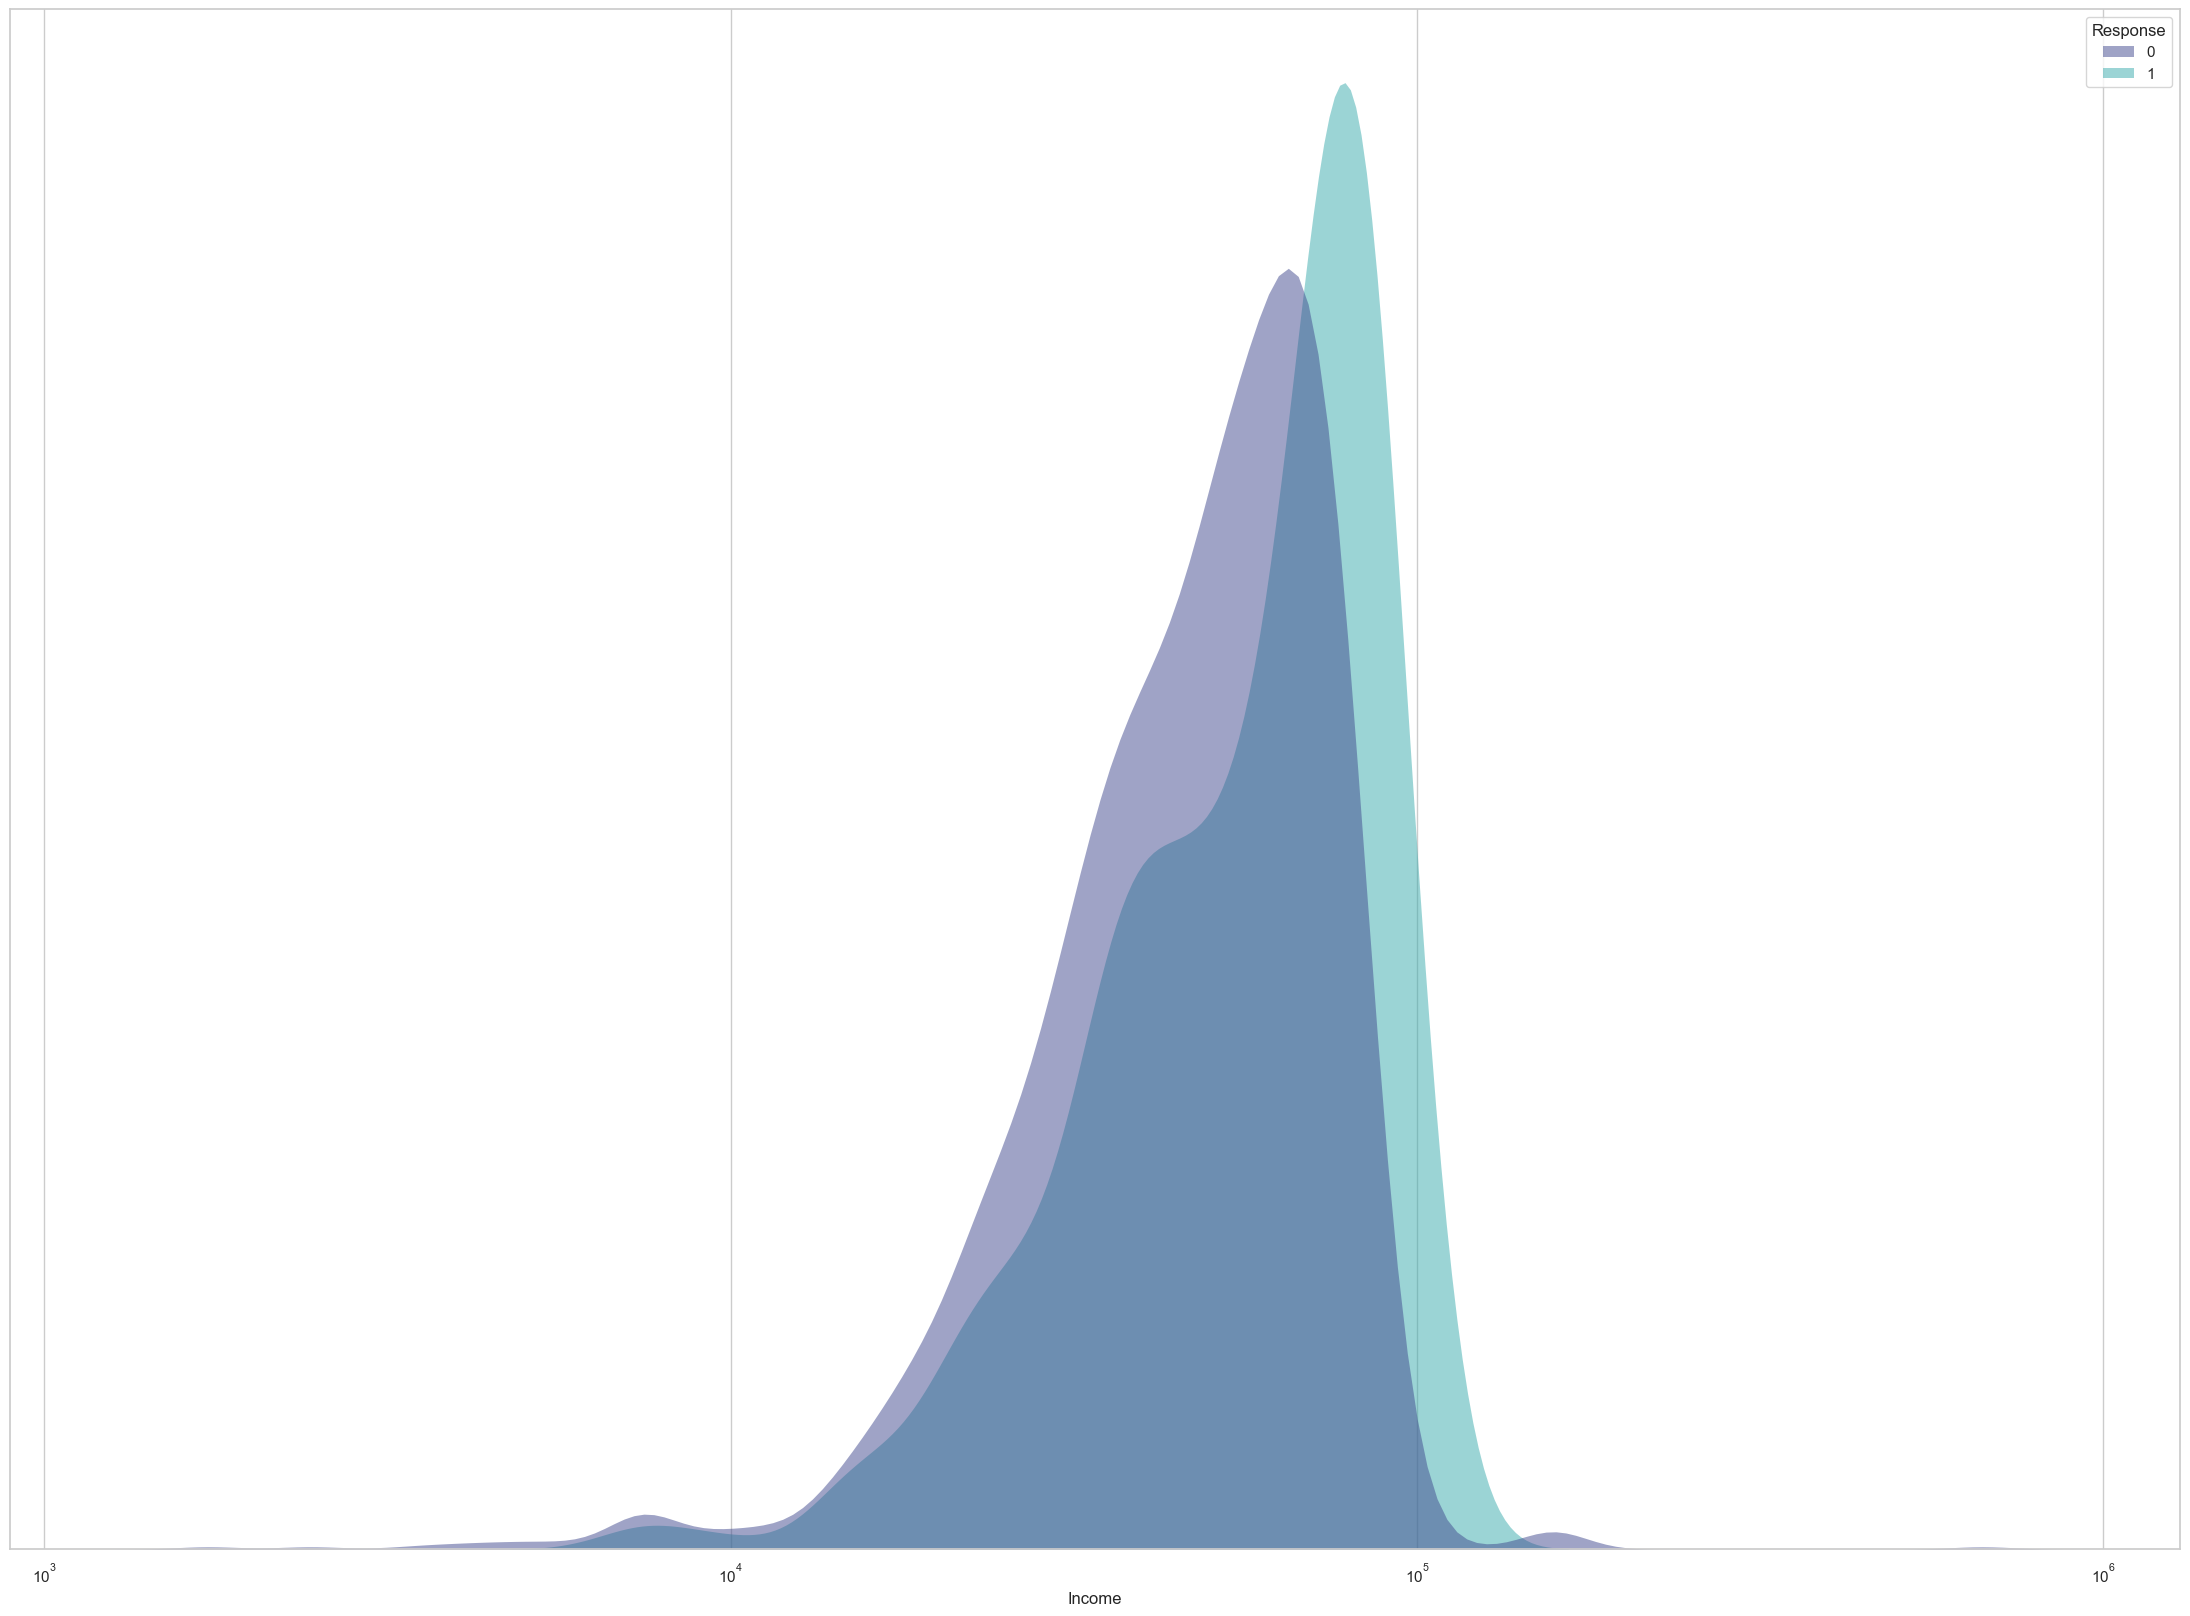

In [31]:
# Income and Response
plt.figure(figsize=(28,20))
sns.kdeplot(
   data=df, x="Income", hue="Response", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Income')

plt.show()

In [32]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

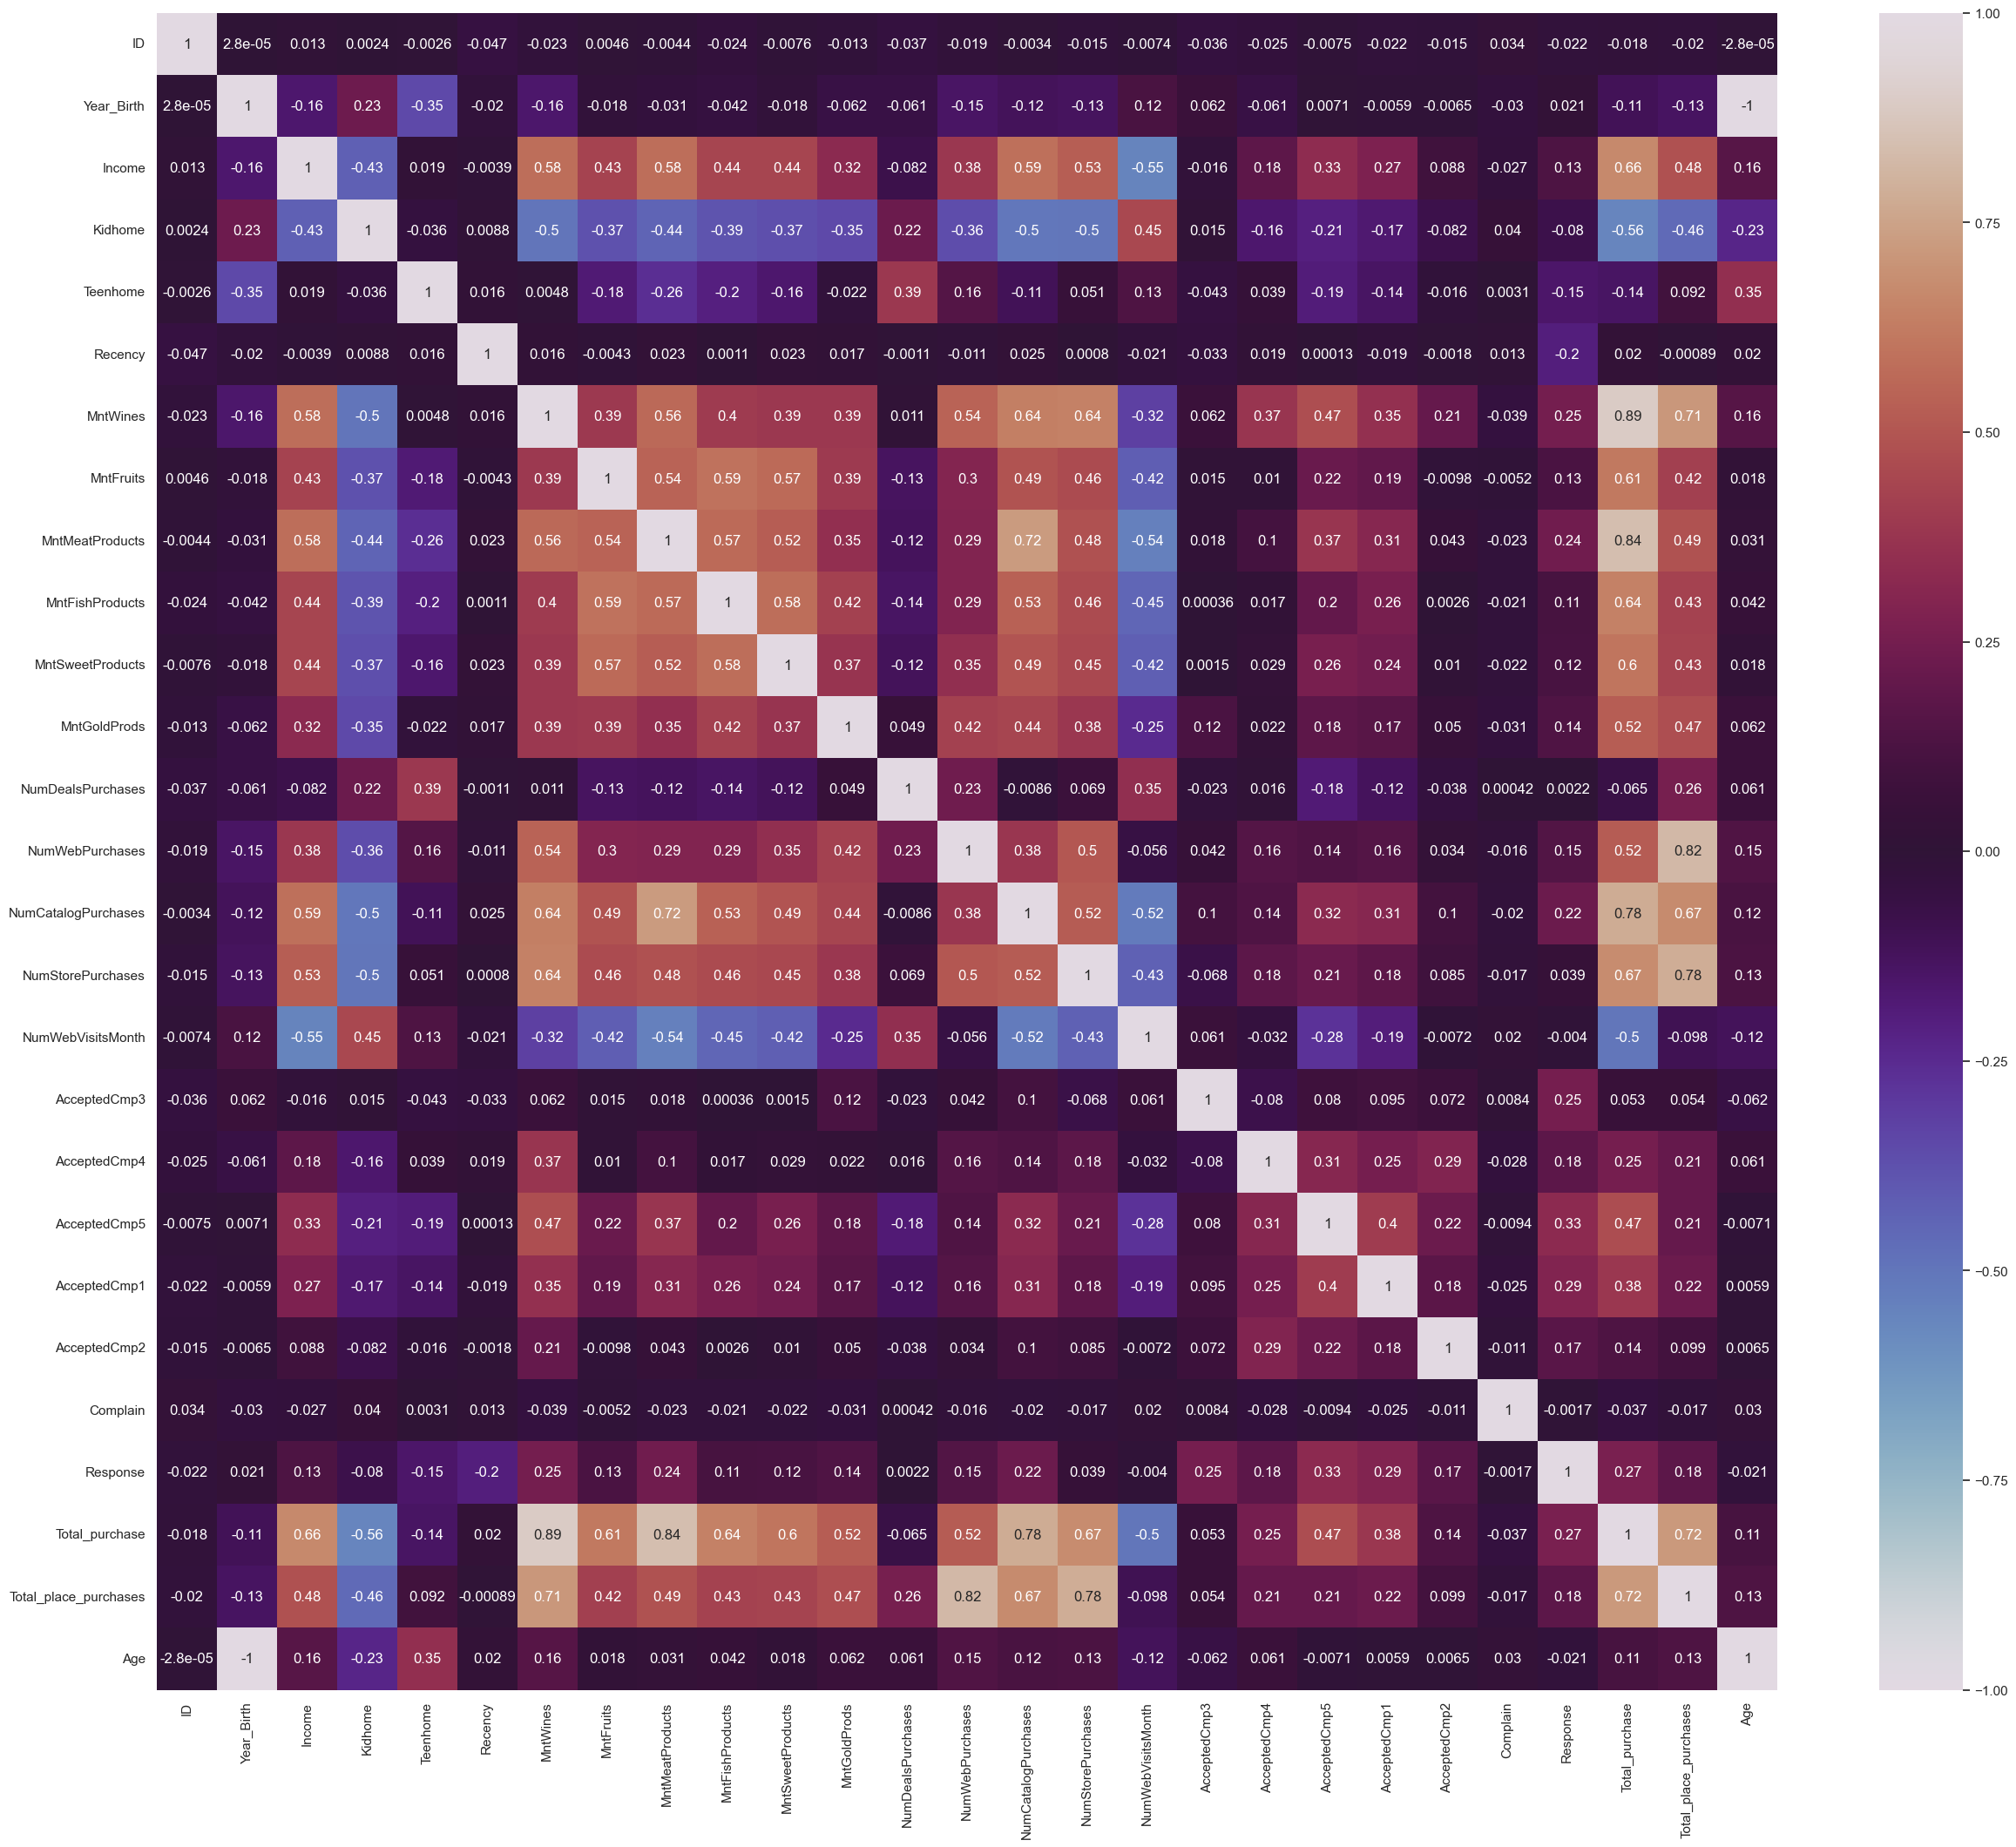

In [34]:
# Heatmap 
plt.figure(figsize = (30,25))
df_cor = df.corr(numeric_only=True)
sns.heatmap(df_cor, annot = True, cmap = colors1)

plt.show()

In [35]:
# Grouping Education 
df['Education']=df['Education'].str.replace('Graduation','Higher Education')
df['Education']=df['Education'].str.replace('PhD','Higher Education')
df['Education']=df['Education'].str.replace('Master','Higher Education')
df['Education']=df['Education'].str.replace('2n Cycle','Higher Education')
# Goruping Marital Status
df['Marital_Status']=df['Marital_Status'].str.replace('Married','In A Relationship')
df['Marital_Status']=df['Marital_Status'].str.replace('Together','In A Relationship')
df['Marital_Status']=df['Marital_Status'].str.replace('Divorced','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Widow','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Alone','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('Absurd','Single')
df['Marital_Status']=df['Marital_Status'].str.replace('YOLO','Single')
# Grouping Kids
df['Total_child']=df['Kidhome'] +df['Teenhome']
# Campaign
df['Camp_total']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3'] +df['AcceptedCmp4']+df['AcceptedCmp5'] +df['Response']

In [36]:
# Removing Outliers
df=df.loc[np.abs(stats.zscore(df['Income']))<3]
df.reset_index(inplace=True)
df=df.drop(columns=['index'])  
df.shape

(2232, 32)

In [37]:
# Remove unnecessary columns and choose necessary ones
cols=['Age', 'Education', 'Marital_Status', 'Income','Recency'
             , 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 
             'NumStorePurchases', 'NumWebVisitsMonth', 'Complain','Camp_total', 'Total_child','Total_purchase']
c_df=df[cols]
# Label Encoding the Data  ( Education and Marital Status Column)
l=LabelEncoder()
c_df['Education']=c_df[['Education']].apply(l.fit_transform)
c_df['Marital_Status']=c_df[['Marital_Status']].apply(l.fit_transform)
# Standard Scaling
ss=StandardScaler()
c_df_final=ss.fit_transform(c_df)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2332\2572020968.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2332\2572020968.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



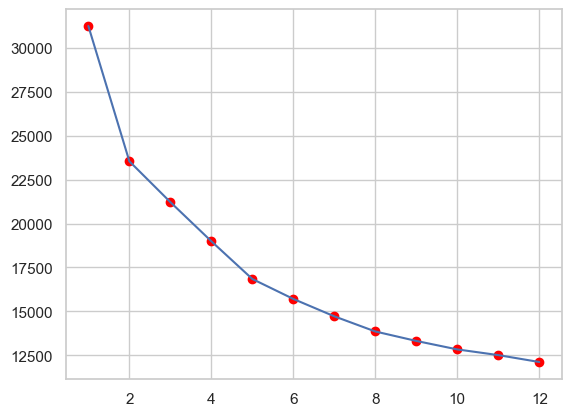

In [39]:
# Optimum no of Clusters
l1=[]
for i in range(1,13):
    k_mean=KMeans(n_clusters=i,random_state=42,init="k-means++",n_init=10)
    k_mean.fit(c_df_final)
    l1.append(k_mean.inertia_)
plt.plot(range(1,13),l1)
plt.scatter(range(1,13),l1,color="red")

plt.show()

K-means clustering method is used and can be summarized as —

1. i. Divide into number of cluster K

2. ii. Find the centroid of the current partition

3. iii. Calculate the distance each points to Centroids

4. iv. Group based on minimum distance

5. v. After re-grouping/re-allotting the points, find the new centroid of the new cluster

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2332\712599394.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



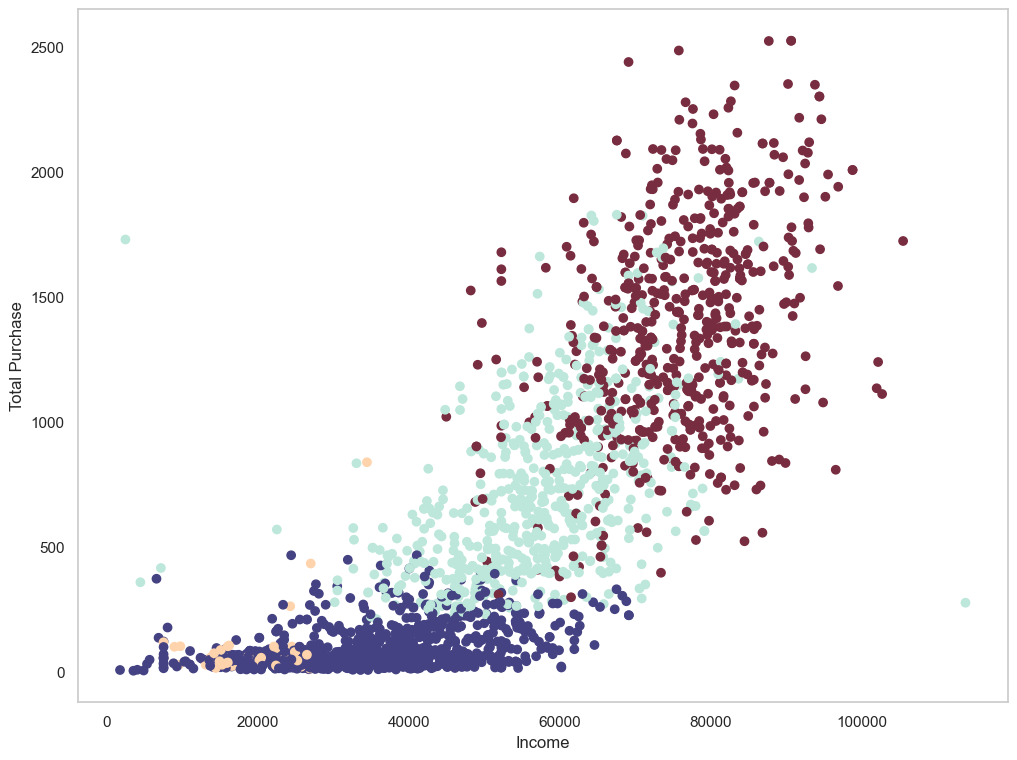

In [41]:
# Kmeans ( 4 Clusters )
km=KMeans(n_clusters=4,random_state=0,init="k-means++",n_init=10,max_iter=300)
km.fit(c_df_final)
clusters=km.predict(c_df_final)
c_df['cluster_no'] = clusters
#plot
plt.figure(figsize=(12,9))
plt.scatter(df['Income'],df['Total_purchase'],c=clusters, cmap='icefire')
plt.xlabel('Income')
plt.ylabel('Total Purchase')
plt.grid(False)

plt.show()

In [42]:
c_df['cluster_no'].value_counts()

cluster_no
1    968
0    619
2    591
3     54
Name: count, dtype: int64

In [43]:
print("Cluster 0 Total Spending: ", c_df.loc[c_df['cluster_no']== 0 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 1 Total Spending: ",c_df.loc[c_df['cluster_no']== 1 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 2 Total Spending: ",c_df.loc[c_df['cluster_no']== 2 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 3 Total Spending: ",c_df.loc[c_df['cluster_no']== 3 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 0 Income: ",c_df.loc[c_df['cluster_no']== 0 ,['Income'] ].mean()['Income'])
print("Cluster 1 Income: ",c_df.loc[c_df['cluster_no']== 1 ,['Income'] ].mean()['Income'])
print("Cluster 2 Income: ",c_df.loc[c_df['cluster_no']== 2 ,['Income'] ].mean()['Income'])
print("Cluster 3 Income: ",c_df.loc[c_df['cluster_no']== 3 ,['Income'] ].mean()['Income'])

Cluster 0 Total Spending:  720.151857835218
Cluster 1 Total Spending:  95.88429752066116
Cluster 2 Total Spending:  1368.331641285956
Cluster 3 Total Spending:  81.79629629629629
Cluster 0 Income:  57016.61996684416
Cluster 1 Income:  35305.27300371826
Cluster 2 Income:  75627.203054848
Cluster 3 Income:  20306.25925925926


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2332\1000110610.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



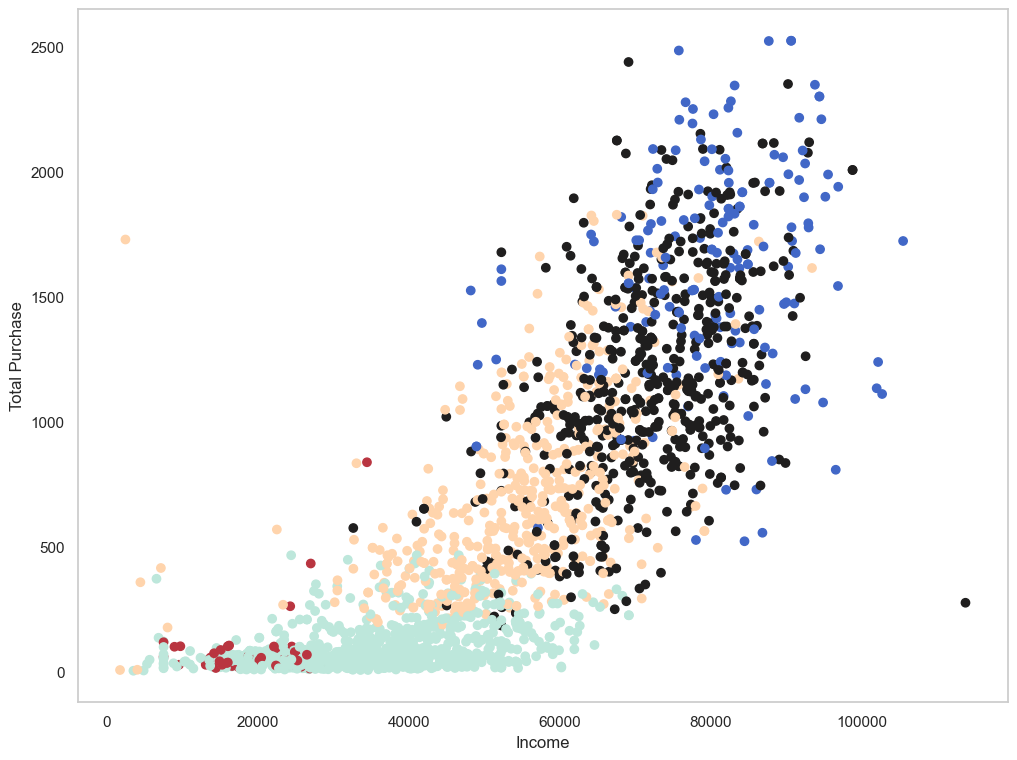

In [44]:
# Kmeans 5 clusters
km=KMeans(n_clusters=5,random_state=0,init="k-means++",n_init=10)
km.fit(c_df_final)
clusters=km.predict(c_df_final)
c_df['cluster_no'] = clusters
#plot
plt.figure(figsize=(12,9))
plt.scatter(df['Income'],df['Total_purchase'],c=clusters, cmap='icefire')
plt.xlabel('Income')
plt.ylabel('Total Purchase')
plt.grid(False)

plt.show()

In [45]:
c_df['cluster_no'].value_counts()

cluster_no
0    955
2    539
4    512
1    172
3     54
Name: count, dtype: int64

In [46]:
print("Cluster 0 Total Spending: ", c_df.loc[c_df['cluster_no']== 0 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 1 Total Spending: ",c_df.loc[c_df['cluster_no']== 1 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 2 Total Spending: ",c_df.loc[c_df['cluster_no']== 2 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 3 Total Spending: ",c_df.loc[c_df['cluster_no']== 3 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 4 Total Spending: ",c_df.loc[c_df['cluster_no']== 4 ,['Total_purchase'] ].mean()['Total_purchase'])
print("Cluster 0 Income: ",c_df.loc[c_df['cluster_no']== 0 ,['Income'] ].mean()['Income'])
print("Cluster 1 Income: ",c_df.loc[c_df['cluster_no']== 1 ,['Income'] ].mean()['Income'])
print("Cluster 2 Income: ",c_df.loc[c_df['cluster_no']== 2 ,['Income'] ].mean()['Income'])
print("Cluster 3 Income: ",c_df.loc[c_df['cluster_no']== 3 ,['Income'] ].mean()['Income'])
print("Cluster 4 Income: ",c_df.loc[c_df['cluster_no']== 4 ,['Income'] ].mean()['Income'])

Cluster 0 Total Spending:  95.38743455497382
Cluster 1 Total Spending:  1607.889534883721
Cluster 2 Total Spending:  1159.473098330241
Cluster 3 Total Spending:  81.79629629629629
Cluster 4 Total Spending:  692.70703125
Cluster 0 Income:  35293.67122119946
Cluster 1 Income:  79928.27617853245
Cluster 2 Income:  71595.87941635467
Cluster 3 Income:  20306.25925925926
Cluster 4 Income:  54924.16114867723
